### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

### Import dataset and convert to DataFrame

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
brca = load_breast_cancer()

In [4]:
brca['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
brca['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
brca.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
df_brca = pd.DataFrame(brca.data, columns = brca.feature_names)
df_brca['target'] = pd.Series(brca.target)
df_brca.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df_brca.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Preprocessing and train test split

In [9]:
x = df_brca.drop('target', axis=1)
y = df_brca['target']

In [10]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [12]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
40,-0.195201,0.532980,-0.238451,-0.261342,-1.048999,-0.834452,-0.724413,-0.737944,-0.100834,-0.982061,...,-0.070240,0.744648,-0.141817,-0.162929,-1.006849,-0.317847,-0.305547,-0.051865,0.150849,-0.691912
375,0.580158,-0.749234,0.590295,0.380003,0.173624,0.747807,-0.279842,0.130282,0.651260,0.414279,...,0.145126,-1.064546,0.173913,-0.033546,-0.388763,0.004675,-0.291634,0.159785,0.408076,0.313331
159,-0.916597,-1.472952,-0.958868,-0.819355,-1.509439,-1.272800,-1.076078,-1.091889,-1.349457,-0.760915,...,-0.809525,-1.217619,-0.869485,-0.721769,-0.669312,-1.089867,-1.216885,-1.143155,-0.263303,-0.393221
278,-0.152598,-0.337343,-0.235980,-0.234892,-1.201293,-1.209502,-0.864150,-0.942490,-0.871183,-1.077040,...,-0.159286,0.068847,-0.248748,-0.248715,-1.199727,-1.132615,-0.797293,-0.955564,-0.915269,-1.181233
303,-1.033042,-0.158159,-1.034246,-0.911788,0.742947,-0.711836,-0.826485,-0.802687,-1.203419,0.453972,...,-1.078732,-0.185190,-1.087219,-0.888068,0.391516,-0.953351,-0.901735,-0.751071,-1.112638,-0.306218


## Implementing Bagging Classifier

In [13]:
bag_models = ['Bagging_Classifier_1', 'Bagging_Classifier_2',  'Bagging_Classifier_3', 'Bagging_Classifier_4', 'Bagging_Classifier_5',
             'Bagging_Classifier_6', 'Bagging_Classifier_7',  'Bagging_Classifier_8', 'Bagging_Classifier_9']

bag_classifiers = []

bag_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=7), n_estimators=25, max_samples=15, bootstrap=True, random_state=7))
bag_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=7), n_estimators=25, max_samples=25, bootstrap=True, random_state=7))
bag_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=7), n_estimators=25, max_samples=50, bootstrap=True, random_state=7))
bag_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=7), n_estimators=50, max_samples=15, bootstrap=True, random_state=7))
bag_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=7), n_estimators=50, max_samples=25, bootstrap=True, random_state=7))
bag_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=7), n_estimators=50, max_samples=50, bootstrap=True, random_state=7))
bag_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=7), n_estimators=100, max_samples=15, bootstrap=True, random_state=7))
bag_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=7), n_estimators=100, max_samples=25, bootstrap=True, random_state=7))
bag_classifiers.append(BaggingClassifier(DecisionTreeClassifier(random_state=7), n_estimators=100, max_samples=50, bootstrap=True, random_state=7))


In [14]:
bag_train_acc = []
bag_test_acc = []
i = 1
for classifier in bag_classifiers:  
    print('Training Model ', i)
    
    bag_model = classifier.fit(x_train, y_train)
    train_pred = bag_model.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    bag_train_acc.append(train_accuracy)
    print('Training accuracy: ', train_accuracy)
    
    print('Testing Model ', i)
    
    test_pred = bag_model.predict(x_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    bag_test_acc.append(test_accuracy)
    print('Testing accuracy: ', test_accuracy)
    i = i+1
    print('\n')

Training Model  1
Training accuracy:  0.9406593406593406
Testing Model  1
Testing accuracy:  0.9210526315789473


Training Model  2
Training accuracy:  0.9538461538461539
Testing Model  2
Testing accuracy:  0.9473684210526315


Training Model  3
Training accuracy:  0.9472527472527472
Testing Model  3
Testing accuracy:  0.9473684210526315


Training Model  4
Training accuracy:  0.9384615384615385
Testing Model  4
Testing accuracy:  0.9210526315789473


Training Model  5
Training accuracy:  0.945054945054945
Testing Model  5
Testing accuracy:  0.9473684210526315


Training Model  6
Training accuracy:  0.9538461538461539
Testing Model  6
Testing accuracy:  0.956140350877193


Training Model  7
Training accuracy:  0.9494505494505494
Testing Model  7
Testing accuracy:  0.9298245614035088


Training Model  8
Training accuracy:  0.9516483516483516
Testing Model  8
Testing accuracy:  0.9385964912280702


Training Model  9
Training accuracy:  0.9560439560439561
Testing Model  9
Testing accuracy

In [15]:
accuracy_compare = pd.DataFrame({'Model' : bag_models, 'Train Accuracy' : bag_train_acc, 'Test Accuracy' : bag_test_acc})
accuracy_compare.sort_values(by ='Test Accuracy', ascending=False)

,Model,Train Accuracy,Test Accuracy
5,Bagging_Classifier_6,0.953846,0.956140
8,Bagging_Classifier_9,0.956044,0.956140
1,Bagging_Classifier_2,0.953846,0.947368
2,Bagging_Classifier_3,0.947253,0.947368
4,Bagging_Classifier_5,0.945055,0.947368
7,Bagging_Classifier_8,0.951648,0.938596
6,Bagging_Classifier_7,0.949451,0.929825
0,Bagging_Classifier_1,0.940659,0.921053
3,Bagging_Classifier_4,0.938462,0.921053


In [16]:
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [20, 7]
}
plt.rcParams.update(params)

[Text(0, 0, 'Bagging_Classifier_1'),
 Text(1, 0, 'Bagging_Classifier_2'),
 Text(2, 0, 'Bagging_Classifier_3'),
 Text(3, 0, 'Bagging_Classifier_4'),
 Text(4, 0, 'Bagging_Classifier_5'),
 Text(5, 0, 'Bagging_Classifier_6'),
 Text(6, 0, 'Bagging_Classifier_7'),
 Text(7, 0, 'Bagging_Classifier_8'),
 Text(8, 0, 'Bagging_Classifier_9')]

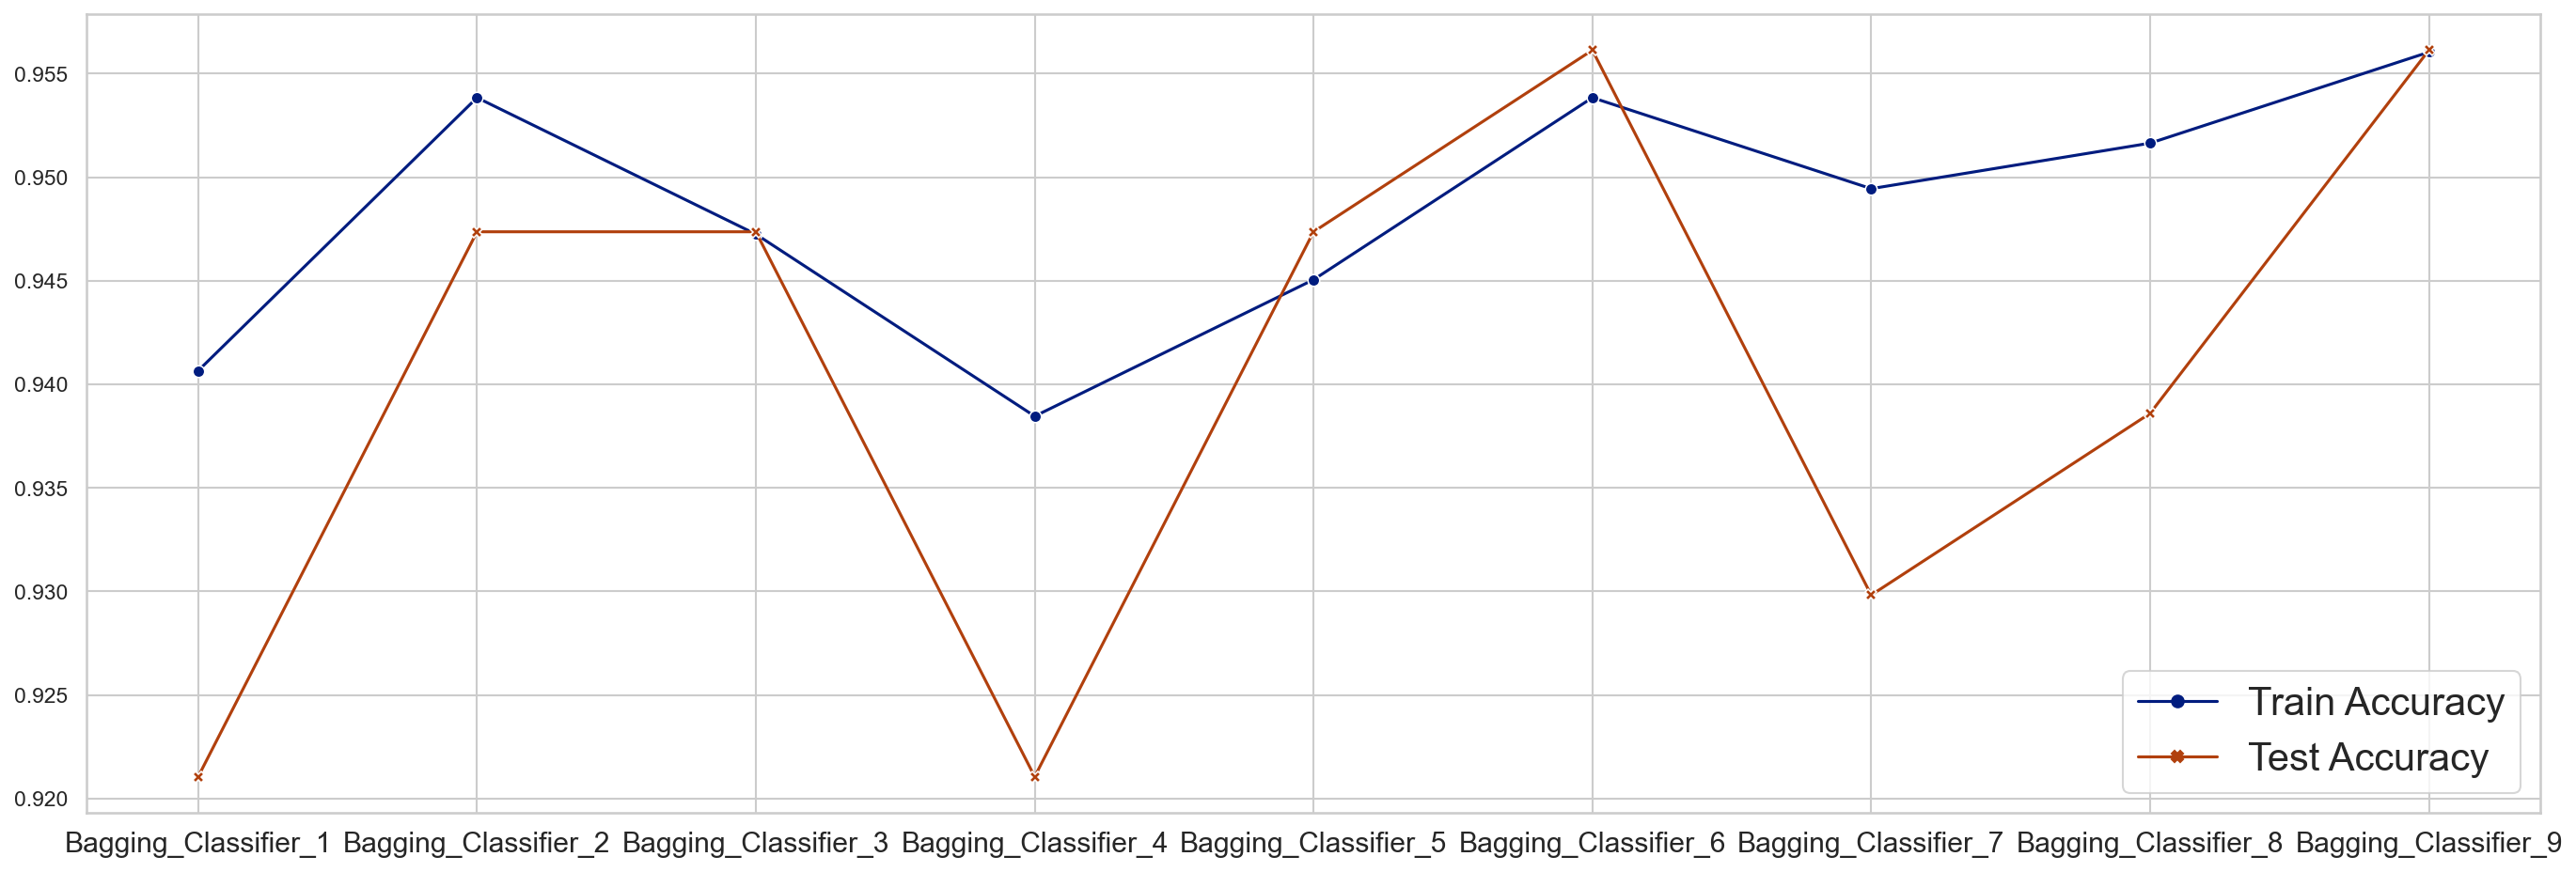

In [17]:
ax = sns.lineplot(data=[accuracy_compare['Train Accuracy'], accuracy_compare['Test Accuracy']], dashes=False, markers=True)
ax.set_xticks(range(len(accuracy_compare['Model'])))
ax.set_xticklabels(accuracy_compare['Model'])

### Analysis of Bagging Classifier
1. 9 bagging classifier models were trained with different values for the parameters for n_estimators and max_samples.
2. From above plot of training and testing accuracy, it is observed that the 6th and 9th bagging classifiers outperformed all the other bagging classifiers.
3. It can be observed that for lower values of max_samples the testing accuracy is lower for all bagging classifiers. An increase in the max_samples increases the test accuracy of all the bagging classifiers.
4. It can be observed that that varying the parameter n_estimators has no impact on the testing or training accuracy.
5. Bagging classifiers 5, 6 and 9 have a great performance on the testing set and can be regarded as close to ideal classifiers as their testing accuracy is either equal to or greater than the training accuracy. 
6. Bagging classifiers 1, 2, 4, 7 and 8 are slightly overfitting the training data and will not able to generalize well.

## Implementing AdaBoost Classifier

In [18]:
boost_models = ['Boosting_Classifier_1', 'Boosting_Classifier_2',  'Boosting_Classifier_3', 'Boosting_Classifier_4', 'Boosting_Classifier_5',
               'Boosting_Classifier_6', 'Boosting_Classifier_7', 'Boosting_Classifier_8', 'Boosting_Classifier_9',]

boost_classifiers = []

boost_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.02))
boost_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.03))
boost_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.04))
boost_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=30, learning_rate=0.02))
boost_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=30, learning_rate=0.03))
boost_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=30, learning_rate=0.04))
boost_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50, learning_rate=0.02))
boost_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50, learning_rate=0.03))
boost_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50, learning_rate=0.04))

In [19]:
boost_train_acc = []
boost_test_acc = []
i = 1
for classifier in boost_classifiers:  
    print('Training Model ', i)
    
    boost_model = classifier.fit(x_train, y_train)
    train_pred = boost_model.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    boost_train_acc.append(train_accuracy)
    print('Training accuracy: ', train_accuracy)
    
    print('Testing Model ', i)
    
    test_pred = boost_model.predict(x_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    boost_test_acc.append(test_accuracy)
    print('Testing accuracy: ', test_accuracy)
    i = i+1
    print('\n')

Training Model  1
Training accuracy:  1.0
Testing Model  1
Testing accuracy:  0.9210526315789473


Training Model  2
Training accuracy:  1.0
Testing Model  2
Testing accuracy:  0.9298245614035088


Training Model  3
Training accuracy:  1.0
Testing Model  3
Testing accuracy:  0.9473684210526315


Training Model  4
Training accuracy:  1.0
Testing Model  4
Testing accuracy:  0.9385964912280702


Training Model  5
Training accuracy:  1.0
Testing Model  5
Testing accuracy:  0.9210526315789473


Training Model  6
Training accuracy:  1.0
Testing Model  6
Testing accuracy:  0.9210526315789473


Training Model  7
Training accuracy:  1.0
Testing Model  7
Testing accuracy:  0.9298245614035088


Training Model  8
Training accuracy:  1.0
Testing Model  8
Testing accuracy:  0.9210526315789473


Training Model  9
Training accuracy:  1.0
Testing Model  9
Testing accuracy:  0.9122807017543859




In [20]:
accuracy_compare = pd.DataFrame({'Model' : boost_models, 'Train Accuracy' : boost_train_acc, 'Test Accuracy' : boost_test_acc})
accuracy_compare.sort_values(by ='Test Accuracy', ascending=False)

,Model,Train Accuracy,Test Accuracy
2,Boosting_Classifier_3,1.0,0.947368
3,Boosting_Classifier_4,1.0,0.938596
1,Boosting_Classifier_2,1.0,0.929825
6,Boosting_Classifier_7,1.0,0.929825
0,Boosting_Classifier_1,1.0,0.921053
4,Boosting_Classifier_5,1.0,0.921053
5,Boosting_Classifier_6,1.0,0.921053
7,Boosting_Classifier_8,1.0,0.921053
8,Boosting_Classifier_9,1.0,0.912281


[Text(0, 0, 'Boosting_Classifier_1'),
 Text(1, 0, 'Boosting_Classifier_2'),
 Text(2, 0, 'Boosting_Classifier_3'),
 Text(3, 0, 'Boosting_Classifier_4'),
 Text(4, 0, 'Boosting_Classifier_5'),
 Text(5, 0, 'Boosting_Classifier_6'),
 Text(6, 0, 'Boosting_Classifier_7'),
 Text(7, 0, 'Boosting_Classifier_8'),
 Text(8, 0, 'Boosting_Classifier_9')]

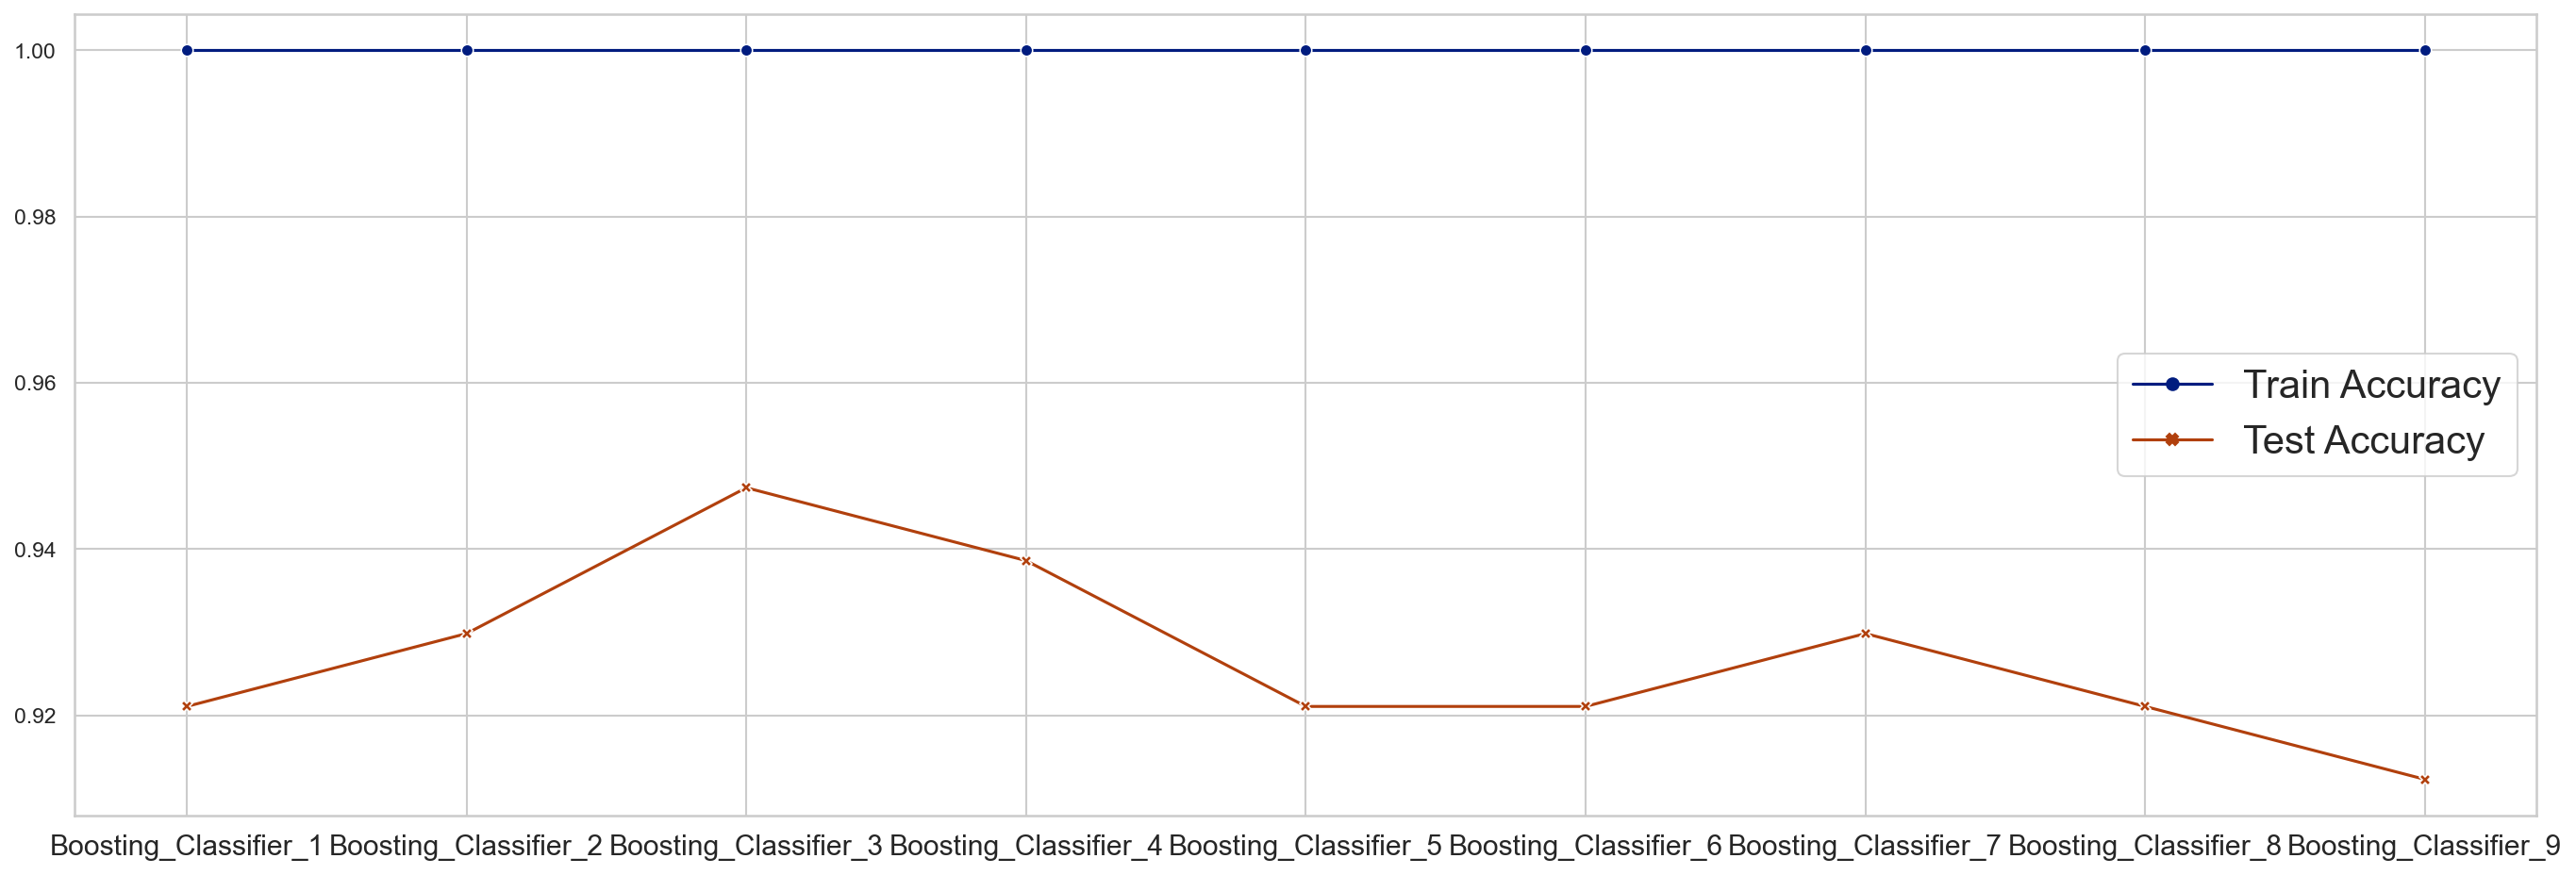

In [21]:
ax = sns.lineplot(data=[accuracy_compare['Train Accuracy'], accuracy_compare['Test Accuracy']], dashes=False, markers=True)
ax.set_xticks(range(len(accuracy_compare['Model'])))
ax.set_xticklabels(accuracy_compare['Model'])

### Analysis of Boosting Classifier
1. 9 boosting classifier models were trained with different values for the parameters n_estimators and learning_rate.
2. It is observed that all the models achieved 100% training accuracy.
3. Boosting classifier 3 outperforms all other classifiers on testing accuracy.
4. It can be claimed that the testing accuracy is not significantly impacted by a change in the parameter n_estimator.
5. It can be claimed that for most cases, testing accuracy decreases when the learning_rate is increased and the n_estimators is kept constant.
6. The boosting classifiers are overfitting the training data and might not able to generalize well for same cases due to a slightly lower testing accuracy.